<a href="https://colab.research.google.com/github/MazeedahOloko/Understanding-Consumer-behavior-and-shopping-habits-using-Python-EDA-/blob/main/Consumer_behavior_and_shopping_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
#Import neccesary applications

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import csv file

shabits=pd.read_csv("shopping_behavior_updated.csv")

In [4]:
#View Dataset
shabits.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
#View Info
shabits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
#Check Data to understand data
shabits.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


In [7]:
#To check if null value exist
shabits.isnull().values.any()

np.False_

In [8]:
#To check for Duplicate in dataset
shabits.duplicated().sum()

np.int64(0)

In [9]:
#Drop unnecessary column
shabits.drop(['Customer ID'], axis=1,inplace=True)

#Check Data
shabits.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Let's analyze the relationship between customer location (age and gender) and their purchase behavior.

# Analysing Age

In [10]:
#Age column
def age_bracket(age):
    if 18 <= age <= 25:
        return 'Youth'
    elif 26 <= age <= 40:
        return 'Adult'
    elif 41 <= age <= 60:
        return 'Middle Age'
    else:
        return 'Old'

# To create a new column in the table
shabits['Age_bracket'] = shabits['Age'].apply(age_bracket)

In [11]:
shabits.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_bracket
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Age
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Youth
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Age
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Youth
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Age


# Age Analysis : CountPlot

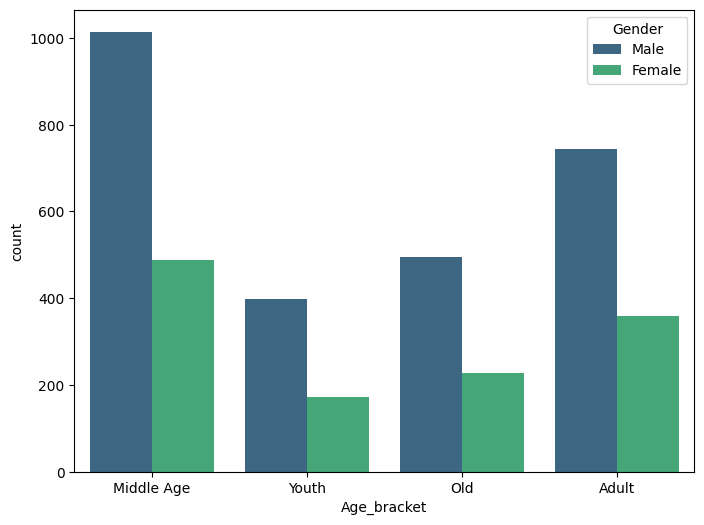

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_bracket', data=shabits, hue='Gender', palette='viridis')
plt.xlabel=('AGE_BRACKET')
plt.title=('Total Customer by gender')
plt.show()

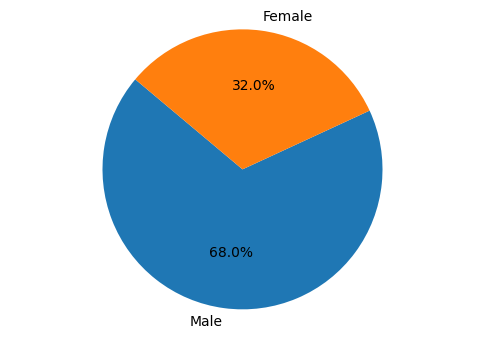

In [13]:
#Gender Count
Gender_counts = shabits['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
plt.set_title=('Total Male & Female consumer')
plt.axis('equal')
plt.show()

# Age Analysis: Age vs Purchased Amount(USD)

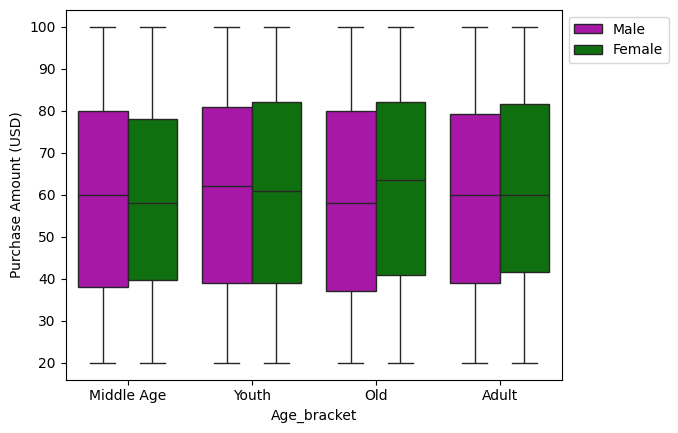

In [14]:
sns.boxplot(x="Age_bracket", y="Purchase Amount (USD)", hue="Gender", data=shabits, palette=["m", "g"])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Age vs Category

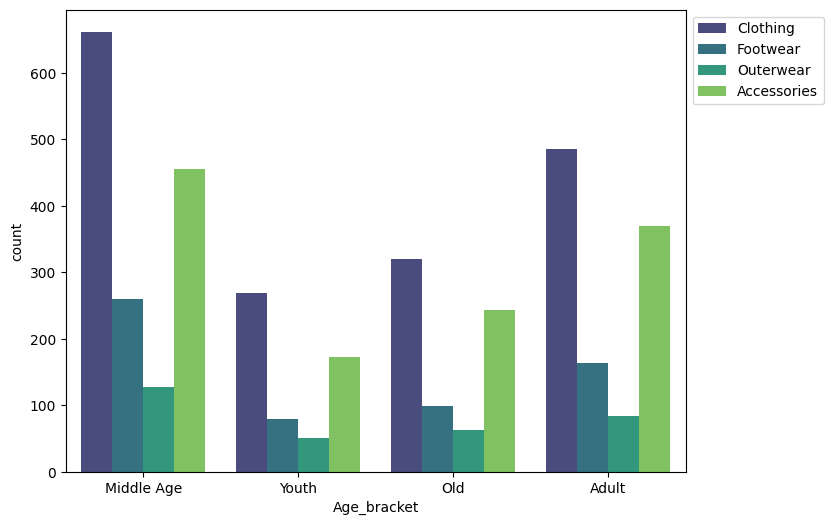

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_bracket', data=shabits, hue='Category', palette='viridis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel=('AGE_BRACKET')
plt.title=('Total Customer by gender')
plt.show()

# Age vs Purchasing Amount vs Category

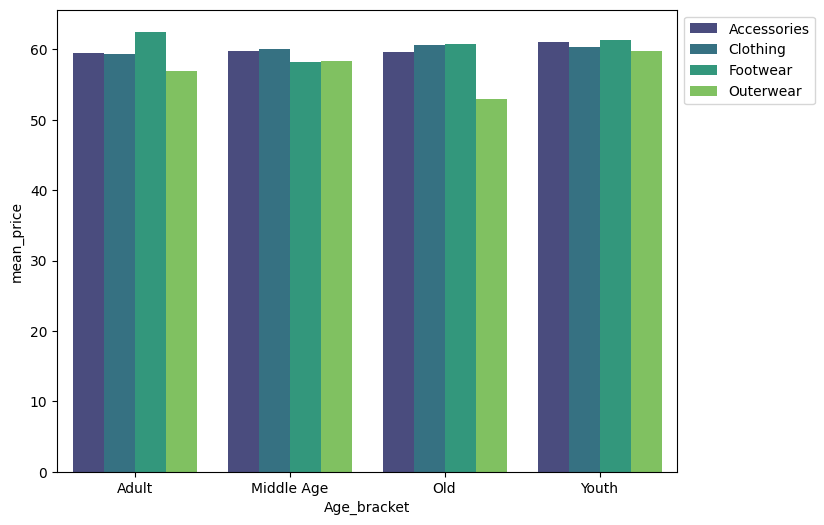

In [16]:
grp_data = shabits.groupby(['Age_bracket', 'Category']).agg(
    mean_price=pd.NamedAgg(column='Purchase Amount (USD)', aggfunc='mean')
).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Age_bracket', y='mean_price', data=grp_data, hue='Category', palette='viridis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel=('AGE_BRACKET')
plt.title=('Average Purchase Amount by Age Bracket and Category')
plt.show()



# Size

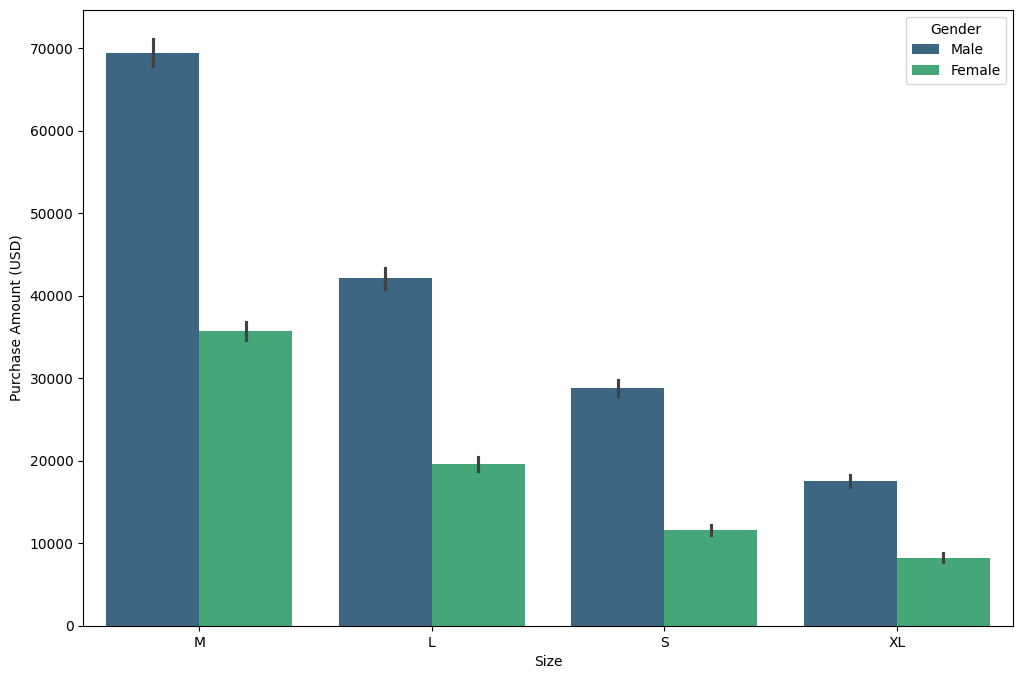

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Size', y='Purchase Amount (USD)', hue='Gender', data=shabits, palette='viridis', estimator=sum, order=shabits.groupby('Size')['Purchase Amount (USD)'].sum().sort_values(ascending=False).index)
plt.title=('Total Purchase Amount based on Size')
plt.xlabel=('Size')
plt.show()


# Top 10 Purchasing Location

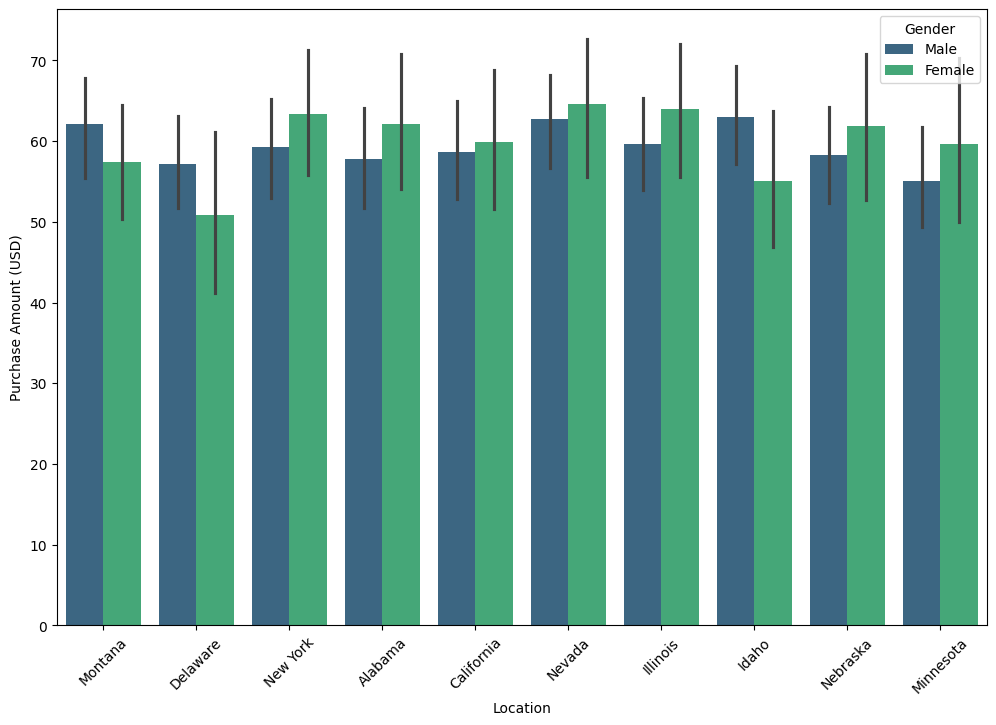

In [18]:
top_countries = shabits['Location'].value_counts().head(10).index

grp_data = shabits.groupby(['Location']).agg(
    mean_price=pd.NamedAgg(column='Purchase Amount (USD)', aggfunc='mean'))

top_countries_data = shabits[shabits['Location'].isin(top_countries)]

# Create a bar plot for male and female customers in the top 10 countries
plt.figure(figsize=(12, 8))
sns.barplot(x='Location', y='Purchase Amount (USD)', hue='Gender', data=top_countries_data, palette='viridis')
plt.title=('Top 10 Countries with Male and Female Customers')
plt.xlabel=('Location')
plt.ylabel=('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()



# Top 5 countries & Product Category

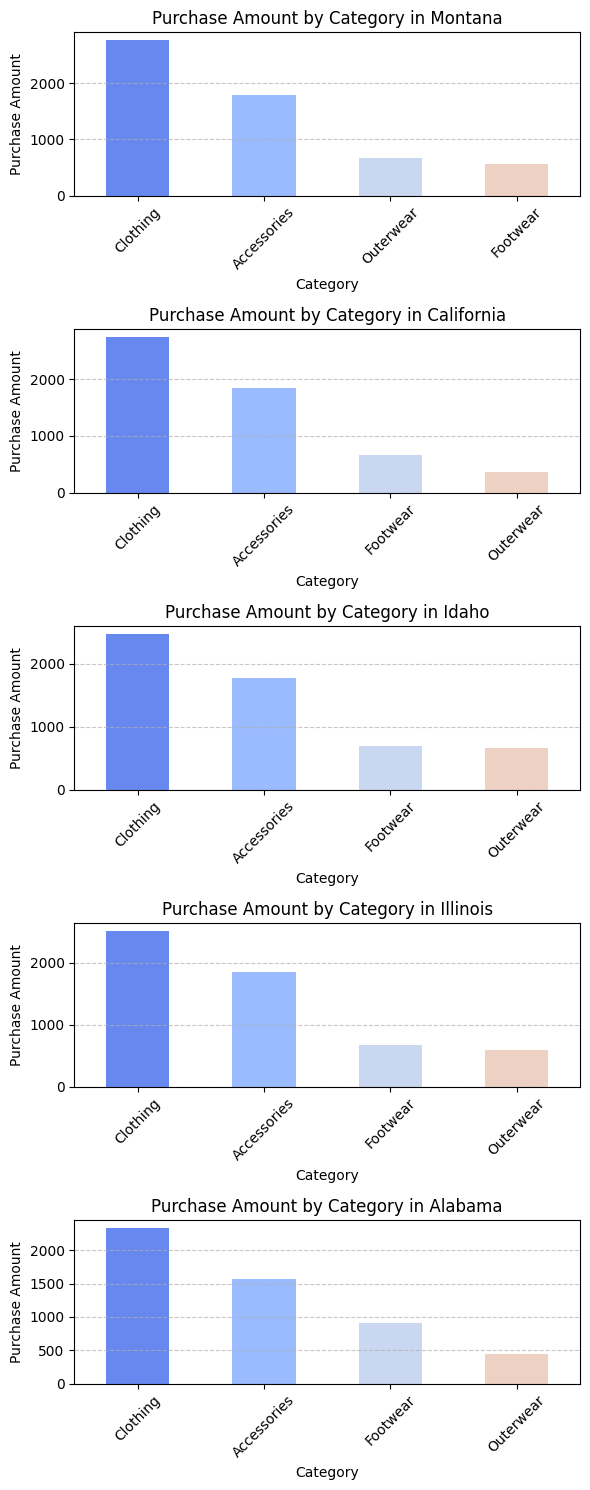

In [19]:
top_locations = shabits['Location'].value_counts().head(5).index

colors = sns.color_palette("coolwarm")
fig, axes = plt.subplots(5, 1, figsize=(6, 15))

for i, location in enumerate(top_locations):
    location_data = shabits[shabits['Location'] == location]

    category_purchase = location_data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

    # Create a bar plot for the category distribution with different colors
    ax = axes[i]
    category_purchase.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f"Purchase Amount by Category in {location}")
    ax.set_xlabel("Category")
    ax.set_ylabel("Purchase Amount")
    ax.set_xticklabels(category_purchase.index, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Impact of Promo Code Used on Purchase

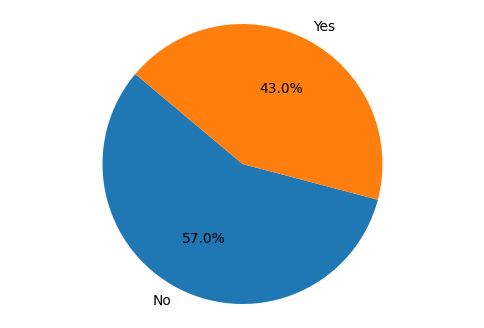

In [20]:
#Impact of promocode
promo_counts = shabits['Promo Code Used'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 4))
plt.pie(promo_counts, labels=promo_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
plt.set_title=('Impact of Promo Code Used on Purchase')
plt.axis('equal')
plt.show()


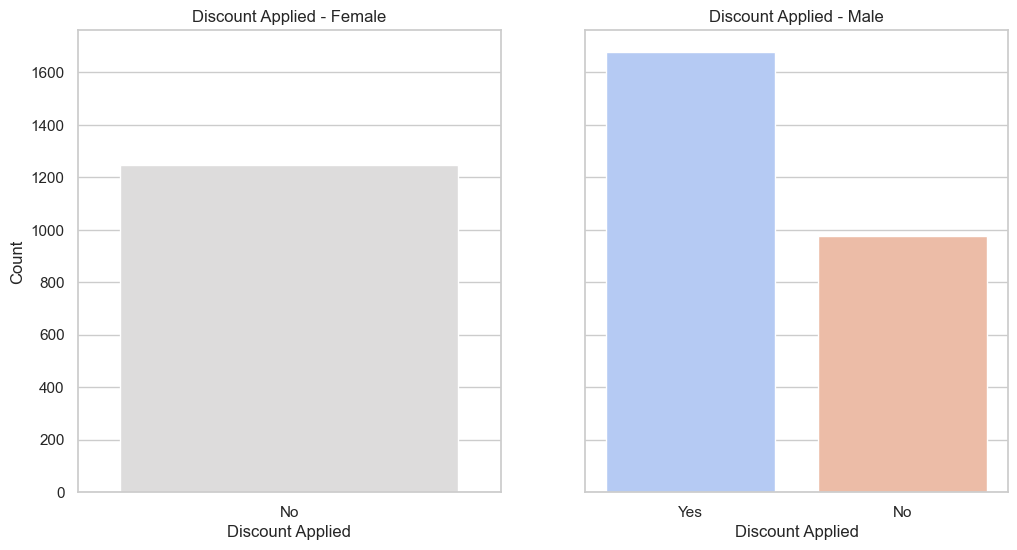

In [21]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for Female
sns.countplot(x='Promo Code Used', data=shabits[shabits['Gender'] == 'Female'], palette='coolwarm',
              hue='Discount Applied', legend=False, ax=axes[0])
axes[0].set_title('Discount Applied - Female')
axes[0].set_xlabel('Discount Applied')
axes[0].set_ylabel('Count')

# Plot for Male
sns.countplot(x='Promo Code Used', data=shabits[shabits['Gender'] == 'Male'], palette='coolwarm',
              hue='Discount Applied', legend=False, ax=axes[1])
axes[1].set_title('Discount Applied - Male')
axes[1].set_xlabel('Discount Applied')
axes[1].set_ylabel('Count')

# Show the plot
plt.show()


# Review Rating vs Previous Purchases vs Purchase Amount

<Figure size 1500x600 with 0 Axes>

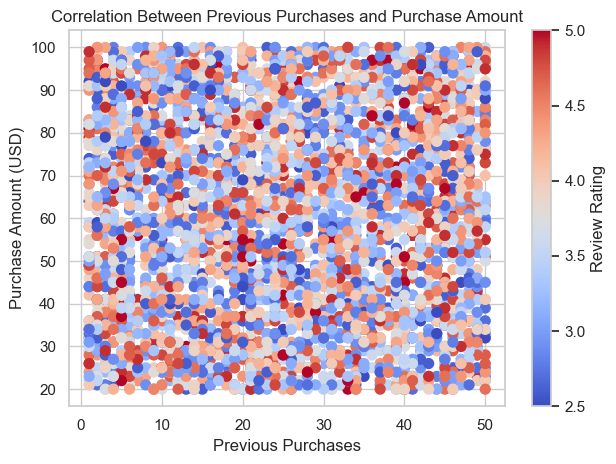

In [22]:
#Rating
plt.figure(figsize=(15, 6))
scatter_plot = shabits.plot.scatter(x='Previous Purchases', y='Purchase Amount (USD)', c='Review Rating', cmap='coolwarm', s=50)
scatter_plot.set_title('Correlation Between Previous Purchases and Purchase Amount')
plt.tight_layout()
plt.show()

# Payment Method

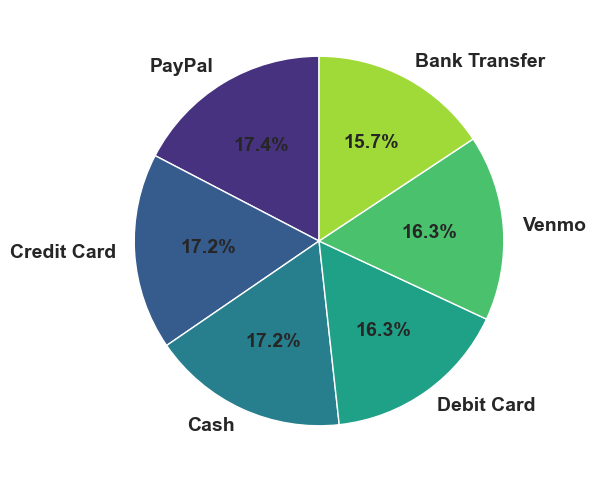

In [23]:
plt.figure(figsize=(6, 6))
payment_method_counts = shabits['Payment Method'].value_counts()
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('viridis'),textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title=('Distribution of Payment Methods')
plt.show()

# Shipping method

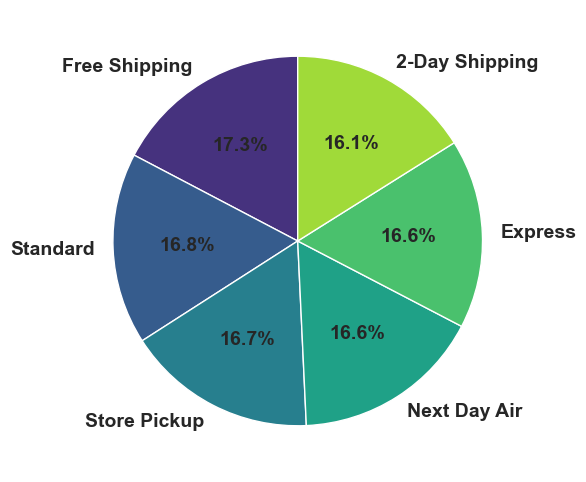

In [24]:
plt.figure(figsize=(6, 6))
payment_method_counts = shabits['Shipping Type'].value_counts()
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('viridis'),textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title=('Distribution of Payment Methods')
plt.show()